In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



In [3]:
for i in range(10): 
        print(i)

0
1
2
3
4
5
6
7
8
9


## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [2]:
input_data = pd.read_csv("/Users/SailahariMullapudi/Desktop/PanPred-master/test_data/curated_input_GY.csv")
input_data.head()

,Unnamed: 0,AMX,Year,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,11657_5#10,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,11657_5#11,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,11657_5#12,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,11657_5#13,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,11657_5#14,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
original = input_data
input_data = input_data.sample(n=100)

In [4]:
input_data = input_data.dropna()

In [5]:
y = input_data["AMX"]

In [6]:
del input_data["Unnamed: 0"]
del input_data["AMX"]
input_data.head()

,Year,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
37,2004.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1068,2006.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
114,2001.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
70,2009.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
321,2006.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
for col in input_data.columns:
    print(col)

Year
yeiU
yhhS
ybaE
eutR
ibrB
ytfP
aslB
narQ
tolR
galM
modB
pgl
glnQ
ydjM
osmE
rcsF
fruB
rsuA
yfcA
ypfN
pdxJ
plsX
ycfF
minD
marC_2
sugE
psd
nsrR
rnfA
kbl
greB
mgsA
mukE
dtd
cpxP
fbp
luxS
fldB
epd
phoR
adk
ybbN
ilvM
ilvE
fre
glmM
gpt
aaeX
ygcM
rplS
raiA
cvrA
group_1150
hflC_2
mgtA
speC_2
yfeK
fsr
trmA
cmr
yceL
flgE
narG
ptsA
dmlR_6
mutS
ybgC
moaC
artM_1
agp
sdaA
ruvC
pgsA
yecF
yaeT
ftsQ
ksgA
ytjA
sanA
ccmG
nuoK
suhB
yfiD
rpmF
fabG_3
lolD_2
prfA
frdC
ftsE
ycaR
cmk
fepC
ftsB
hypA
xerD_1
group_16546
rsmE
xseB
ybaZ
ybaB
ptsN
yeeX
yhbP
gmr_1
sgrR
poxB
putA
clpA
ypdC_1
pdxK
folM
ugpB
astA
yeiA
flgK
rne
chaA
mobB
ebgA
allS_1
chaC
pdxY
yciH
rfe
leuE
thiQ
qor
mak_1
ydhF
acrR
sohB
group_2705
yehW
baeS
topB
yaeQ
malE
macA_2
yjjX
ycfS
ybhB
ybhK
yeaR3
yecM
nemR
yccW
ycaC
dkgA
ycfC
group_3304
yliJ
ltaE
mdtC
asmA
pheT
yceH
emrD
fkpA
hyaA
ribD
aaeR
ynjF
ycgM
potF_1
dld
yeaG
yecS_1
araD
trpR
tdk
ybbK
pldA
ygiW
accC
yicC
torY
glpA
hexR
lytM
sfsA
lepA
metH
fumC
sulA
gcvP
tpx
tsx
cyaY
ycfR
ybeL
mpl
nadE
mq

group_1264
spaO
eprH
spaS
agp_2
eprJ
tnpR
group_1554
macB_2
group_3489
group_717
group_8614
group_984
pemI
fimC_1
ycbU
lolD_3
resA
group_1585
yifN
ycbS
sphX
nqrC
group_16593
ycbR
group_4514
epaP
kspT
pemK
epaR
ybl124
cutS
epaQ
ninX
group_704
yidI
mtnA
hcrB
eaa
aroF_2
prgI
group_2806
group_5105
group_2890
mtnK
group_285
group_3376
group_6972
group_1322
lexA_3
cscA
lacY_1
sitD_2
group_1017
group_1577
group_1444
nohA2
group_858
group_1087
group_3557
mipA_2
group_3177
group_2609
group_11313
yiaO_1
group_5152
hsdR
group_3181
yfjJ
cas3
group_3951
djlB
siaT
yhjE_2
mchE
yiaM_1
ybeR
group_370
group_3532
group_16702
group_1822
cybC_2
group_566
group_3164
group_2871
group_3911
ybl63
papG
gntR_2
group_5043
lldP2
group_622
ulaB
ygaV_1
group_503
yfdL
group_16611
group_3957
shlA
group_1167
group_1582
group_1024
group_1274
group_5950
urf2
group_15639
ybl66
pagN_2
group_1016
ybgP
group_11147
pptE
fabH_2
group_1159
group_1581
group_16735
kpdD
mexR
group_3935
ybfO
group_6626
traR
kpdC
cro
group_1834
paaY

dnaB_1
group_11136
group_3574
group_11079
group_11087
dnaB_2
yhdH_2
group_8587
group_11548
group_6984
group_11710
group_16671
group_2229
ychG
group_3991
group_6005
ydaE
group_4021
araB_2
group_7140
group_859
group_1183
group_1252
group_16691
group_17560
group_3518
tetD
group_16811
group_3186
insH_2
group_4542
tdcF_2
kdgT_2
group_5107
hokD1
group_11357
group_16566
group_16776
group_3170
group_5097
relE
group_8626
group_7034
group_11418
group_2877
group_5857
group_6975
group_11371
group_5143
pilV
bla_1
group_2646
group_11182
gpH
group_2940
ugpB_2
flxA
group_8542
group_11161
ugpC_2
group_2243
stbB
ugpA_2
group_11741
yjgB_2
pezT
ycjP_2
group_5709
group_5929
pgaC_2
group_17672
group_1973
int_2
cII
group_716
rfbX
group_3510
yagE_3
wbuC
group_1396
group_1725
group_6061
gclK
group_6088
group_6309
ibeT
group_17469
group_3207
aac3-VI
group_3592
ptnC
group_7205
yqjZ
group_11708
bin3
group_16914
group_1726
group_2631
mprB
group_4442
group_4582
group_5205
group_7210
group_11706
group_16832
repA
mle

group_10900
group_11826
group_11913
group_12763
pulD_2
group_17221
araG_2
pcaI
group_18210
group_20433
group_20536
group_4703
group_6113
group_6184
group_6300
group_6304
group_6322
group_7039
group_7588
group_9130
group_9184
group_9399
wbaD
group_11705
group_11768
group_11773
hcaR_3
group_16906
group_17468
group_17814
group_18480
group_18763
dcuA_2
group_20557
group_3021
group_3638
group_4041
group_6016
group_7036
group_7291
dcuR_2
group_7589
group_8806
group_9319
group_11723
aggR
argH_1
aec77
group_17396
group_18491
group_18849
leuE_2
group_20457
group_3303
aspA_2
group_4036
group_4132
group_4700
group_5290
group_5447
group_5454
group_7358
group_7472
fimC_3
group_8908
dnaQ_2
group_11586
group_11800
group_1192
group_12006
group_12197
group_12368
group_12777
group_12988
group_17414
group_18151
kikA
group_19197
group_2015
group_2611
group_2645
group_2650
group_3652
group_4154
group_4692
group_5218
group_7167
ykgF_2
group_7447
group_7483
group_8769
group_9477
group_11171
qseD
group_11561


group_8850
group_9012
C_1
group_9196
group_9282
group_9377
group_9478
group_9517
group_9525
group_9739
group_10021
trhG
group_10164
group_10174
group_10262
group_11336
group_11489
group_11640
group_11646
group_11758
group_11977
group_12125
group_12377
group_12395
group_12590
group_12592
group_12671
group_12892
group_1290
group_13240
group_13547
gmd_2
nupG_1
group_16785
group_17025
group_17240
dxs_2
group_17327
group_1747
group_17577
sfaS_2
group_17790
group_18450
group_18785
group_1885
group_19312
group_19328
group_20008
group_20256
hsdS_2
group_20479
group_20788
group_20911
group_21015
group_21445
ansB_1
group_23131
group_23241
slyB_2
group_25740
group_25775
group_2682
group_27168
group_3314
group_3715
group_3722
group_4577
group_4785
group_5239
group_5316
group_5360
group_5364
group_5394
group_5396
group_5446
group_5495
group_6351
group_6353
yjjL_2
group_6445
group_7550
group_7558
group_7571
group_7715
group_7718
group_7895
group_7904
group_8894
group_8947
group_9136
group_9334
group

group_5457
group_5488
group_5491
group_5496
group_5578
group_6218
group_6277
group_6320
group_6470
group_6542
group_7275
group_7313
group_7404
group_7477
group_7533
group_7722
group_7783
group_7825
group_7887
group_7955
group_7996
group_8008
wcaH
group_8738
group_8788
group_8863
aadA_1
group_9138
group_9216
group_9241
group_9526
group_9530
group_9608
pagN_3
group_9688
group_9718
group_9731
group_9821
group_9873
group_10045
group_10300
papC_1
group_10340
group_10901
traE_1
group_11685
group_11721
group_12151
group_12207
group_12246
group_12266
group_12294
yiaD_3
sinR_2
group_12421
group_12467
group_12476
group_12485
yjbM
group_12554
group_12595
group_12648
group_12702
group_12711
group_12756
group_12770
group_12805
group_12940
group_13007
group_13195
group_13246
group_13335
group_13410
group_13533
group_13674
group_13872
group_13956
group_13957
group_14000
group_14146
group_14664
group_14666
group_14668
group_14669
group_14677
group_15532
group_16717
group_16800
group_17017
group_17173


group_18046
group_18048
group_18401
group_18437
group_18717
group_18835
group_18858
group_18862
group_18872
group_18880
group_18881
group_19285
group_19569
group_19797
group_20393
group_20445
group_20649
group_20655
group_20713
group_20737
traK_1
traV_1
group_21071
rpmE2_1
group_21244
group_21294
group_21311
group_21313
group_21437
group_21585
group_22114
group_22115
group_22124
group_22222
group_22315
group_22353
group_22555
group_22557
group_22564
group_22821
group_23334
group_23386
group_23628
group_23674
group_24433
group_24438
group_24797
group_25526
group_25821
group_25984
group_26052
group_26057
metB_2
group_26431
group_26561
kstR2_2
group_26668
group_26960
group_27043
group_28190
group_2989
group_3005
group_31751
group_3321
group_3325
group_35857
group_3624
group_3713
sodC1
traD_4
group_4114
group_4181
helD_2
group_4716
group_4736
group_4766
group_4775
group_4797
group_4834
group_5275
group_5353
group_5468
group_5489
group_5500
group_5529
ynfO
uppP_2
group_6138
group_6163
group

group_14727
group_14780
group_14853
group_14941
group_15121
group_15123
group_15153
group_15185
yjeO_1
group_15609
group_15842
group_16016
group_16537
group_16644
group_16724
group_16729
group_17195
group_17206
group_17207
group_17245
group_17311
group_17313
group_17467
group_17512
group_17531
group_17579
group_17673
group_17777
group_17840
group_17843
group_17846
group_17870
group_18019
group_18088
group_18131
group_18179
group_18357
group_18432
group_18511
group_18568
group_18664
group_18702
group_18771
group_18854
degS_2
group_18920
group_18947
group_19149
group_19310
group_19420
group_19422
yfjH
group_19457
group_19538
group_19572
group_19598
group_19608
pstP
group_19661
group_19766
group_19811
group_19847
group_19898
group_19961
group_19992
group_20048
group_20108
group_20132
group_20163
group_20211
group_20294
group_20355
group_20379
ybl130
group_20434
group_20534
group_20590
group_20592
group_20601
group_20615
group_20619
group_20692
group_20696
group_20703
group_20759
gp19
grou

group_28956
group_29751
group_29946
group_30225
group_30268
group_30309
group_30531
group_30765
group_31143
group_31752
group_32207
group_32351
group_32628
group_33471
group_33488
amnD
group_35761
group_35804
group_36116
neo_2
group_36442
group_36624
yffR
espF
group_38197
group_39786
group_39895
group_40343
group_40375
group_4159
group_42269
group_4539
group_5279
group_5352
group_5420
group_5439
group_5481
group_5490
fdnG
group_5601
group_5612
group_5625
rusA_4
group_6321
group_6376
group_6449
group_6462
group_6468
group_6469
group_6525
group_6563
group_6573
group_6583
group_6594
group_6612
group_6615
group_6623
group_6642
group_6660
group_6662
group_6663
group_6664
group_6675
group_6680
group_6682
group_6684
group_7232
group_7290
group_7408
group_7417
group_7439
group_7443
group_7471
group_7513
fkpA_2
group_7651
group_7653
group_7762
group_7804
group_7845
group_7853
group_7862
group_7876
group_7880
group_7891
group_7909
group_7938
group_7978
group_8023
group_8084
GpJ
group_8113
group_

group_15735
group_15750
bcsA_2
group_15840
group_15909
group_15918
group_15933
group_15935
group_15941
group_15948
group_15951
group_15967
group_15970
group_15972
group_16036
group_16038
group_16174
group_16230
group_16259
yniC_1
group_16324
group_16330
group_16607
group_16813
group_16969
group_16970
group_16989
group_16997
group_17102
group_17115
group_17128
group_17302
group_17303
group_17460
group_17510
group_17584
group_17650
group_17768
ydfQ_1
group_17779
group_17805
group_18012
group_18015
group_18057
group_18068
group_18097
group_18098
group_18140
group_18254
maa_1
group_18364
group_18366
group_18387
group_18464
group_18465
group_18481
group_18533
group_18541
group_18554
group_18559
group_18636
group_18666
group_18670
group_18693
group_18820
group_18822
group_18935
thiQ_2
group_19064
group_19105
group_19253
group_19283
group_19289
group_19447
group_19539
group_19587
group_19606
group_19631
group_19658
group_19771
group_19786
group_19902
group_19928
group_19931
group_19980
group_

group_15306
group_15307
group_15310
group_15323
group_15333
group_15338
group_15342
group_15390
group_15398
group_15400
group_15416
group_15453
glfT1
group_15484
group_15492
group_15512
group_15514
group_15515
group_15531
group_15539
group_15549
group_15554
group_15563
group_15578
group_15584
group_15594
gatZ_2
group_15610
group_15620
group_15628
group_15647
group_15648
group_15652
group_15691
group_15705
group_15706
group_15727
group_15730
group_15733
group_15734
group_15737
group_15746
group_15751
group_15763
group_15799
group_15829
group_15835
group_15841
group_15851
group_15864
group_15881
group_15886
group_15896
group_15910
group_15912
group_15932
group_15942
wcaC_1
group_15947
group_15950
group_15953
group_15994
group_16001
group_16008
group_16018
group_16031
group_16037
ykgI
group_16048
group_16060
group_16068
group_16111
group_16168
group_16264
group_16271
group_16275
group_16321
group_16325
group_16327
group_16383
group_16664
group_16870
pse4
group_17319
group_17332
group_1752

group_14762
group_14772
group_14775
group_14797
group_14812
group_14816
group_14818
group_14829
group_14834
group_14848
group_14855
group_14856
group_14857
group_14864
group_14877
group_14879
group_14888
group_14895
group_14896
cueR_2
group_14920
group_14923
group_14932
group_14936
group_14944
group_14963
group_14970
group_14972
group_14974
group_14976
group_14977
group_14980
group_14985
group_14997
group_15017
group_15025
group_15030
group_15035
group_15041
group_15049
group_15055
group_15064
group_15071
group_15078
group_15083
group_15095
group_15097
group_15099
pipB2_3
group_15110
group_15117
group_15124
group_15128
group_15145
group_15146
group_15156
group_15160
group_15171
ompT_1
group_15178
group_15181
group_15183
dnaC_3
group_15210
tagE_1
group_15227
group_15228
group_15229
hin_1
group_15232
group_15240
group_15243
group_15278
group_15283
group_15292
group_15297
group_15311
group_15318
group_15322
group_15328
group_15341
group_15344
group_15345
group_15348
group_15353
group_1535

group_9161
group_9247
group_9250
group_9392
group_9393
group_9398
group_9451
group_9454
group_9470
group_9549
group_9590
group_9602
group_9612
group_9629
group_9634
group_9663
group_9726
group_9766
group_9874
group_9883
group_9894
group_9901
group_9904
group_9910
group_9942
group_9982
group_9993
group_9994
group_10011
group_10024
group_10108
ycjS_2
group_10192
group_10197
group_10246
pifA_2
group_10396
group_10492
group_10526
group_10529
group_10534
group_10570
group_10590
group_10593
group_10626
group_10642
group_10684
group_10696
clpV1_3
gemA_1
perA
group_10721
group_10727
group_10732
group_10739
group_11037
group_11056
group_11197
group_11272
group_11277
group_11314
group_11328
group_11402
group_11428
group_11456
group_11511
group_11631
group_11771
group_11791
group_11830
group_11831
group_11863
group_11870
group_11896
group_11922
group_11923
group_11929
group_11930
group_11934
group_11940
group_11983
group_12003
yadA_3
group_12028
group_12069
group_12084
group_12088
group_12089
gro

group_40358
group_40366
group_40447
group_40470
group_40527
group_40564
group_40568
group_40628
group_40668
group_40852
group_40880
group_40920
group_40943
group_40961
group_40965
group_40986
group_41035
group_41042
group_41046
group_41051
group_41076
group_41086
group_41103
group_41124
dmlR_7
group_41154
group_41168
group_41173
group_41184
group_41234
group_41251
group_41259
group_41261
group_41336
group_41344
group_41381
group_41387
group_41407
group_41408
group_41488
group_41512
group_41569
group_41638
group_41673
group_41706
group_41791
group_41805
group_41838
group_41859
group_41881
group_41895
group_41939
group_41945
group_42010
group_42063
ycgF_2
group_42201
group_42289
group_42308
group_42882
group_42914
group_42939
group_42971
group_42983
group_42997
group_43023
group_43235
group_43260
group_43321
group_43373
group_43403
group_43479
group_43491
group_43556
group_43580
group_43611
group_43653
group_43667
group_43755
group_43789
group_43797
group_43819
group_43839
group_43852
gr

group_31146
group_31149
group_31152
group_31171
dadX_2
group_31183
group_31185
group_31186
group_31187
group_31197
group_31288
efeU_1
group_31436
group_31445
group_31447
group_31451
group_31474
group_31484
group_31486
group_31487
group_31491
group_31514
group_31517
group_31518
group_31519
group_31523
group_31539
group_31607
group_31635
group_31645
group_31690
group_31700
group_31714
group_31717
group_31719
group_31749
group_31753
group_31809
group_31818
group_31822
group_31852
group_31856
group_31872
group_31888
group_31905
group_31906
group_31920
group_31925
group_31943
group_31961
group_31963
group_31966
group_31975
panE_2
group_31980
group_31982
group_31998
group_32001
group_32004
group_32011
group_32014
group_32019
group_32111
group_32112
group_32117
group_32122
group_32123
group_32126
group_32131
group_32198
group_32205
group_32216
group_32250
group_32252
group_32257
group_32275
group_32293
group_32295
group_32299
group_32372
group_32456
papI_1
group_32465
group_32467
group_32469


In [8]:
input_data.head()

,Year,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
37,2004.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1068,2006.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
114,2001.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
70,2009.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
321,2006.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
del input_data["Year"]
input_data.head()

,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,galM,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
37,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1068,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
114,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
70,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
321,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x = np.array(input_data)
print(x)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [11]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [12]:
predicted

array([0., 1., 1., 1., 1., 0.])

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [13]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[2 1]
 [0 3]]


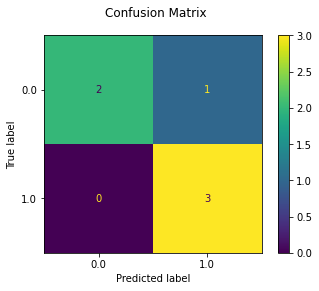

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()